# Лабораторная работа №4
## Линейные модели, SVM и деревья решений

### Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
    - одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
    - SVM;
    - дерево решений.
5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
6. Постройте график, показывающий важность признаков в дереве решений.
7. Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
from sklearn import tree
from operator import itemgetter

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
#Первые 5 записей датасета
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
#Проверка наличия пустых значений
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#Размер исходного датасета
data.shape

(1025, 14)

In [6]:
#Проверка типов
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
#Удаление ненужных столбцов
data = data.dropna(axis=0, how="any")

In [8]:
#Кодирование категориальных признаков
LE = LabelEncoder()
for column in data.columns:
    if data[column].dtype=="object":
        data[column] = LE.fit_transform(data[column])

<Axes: >

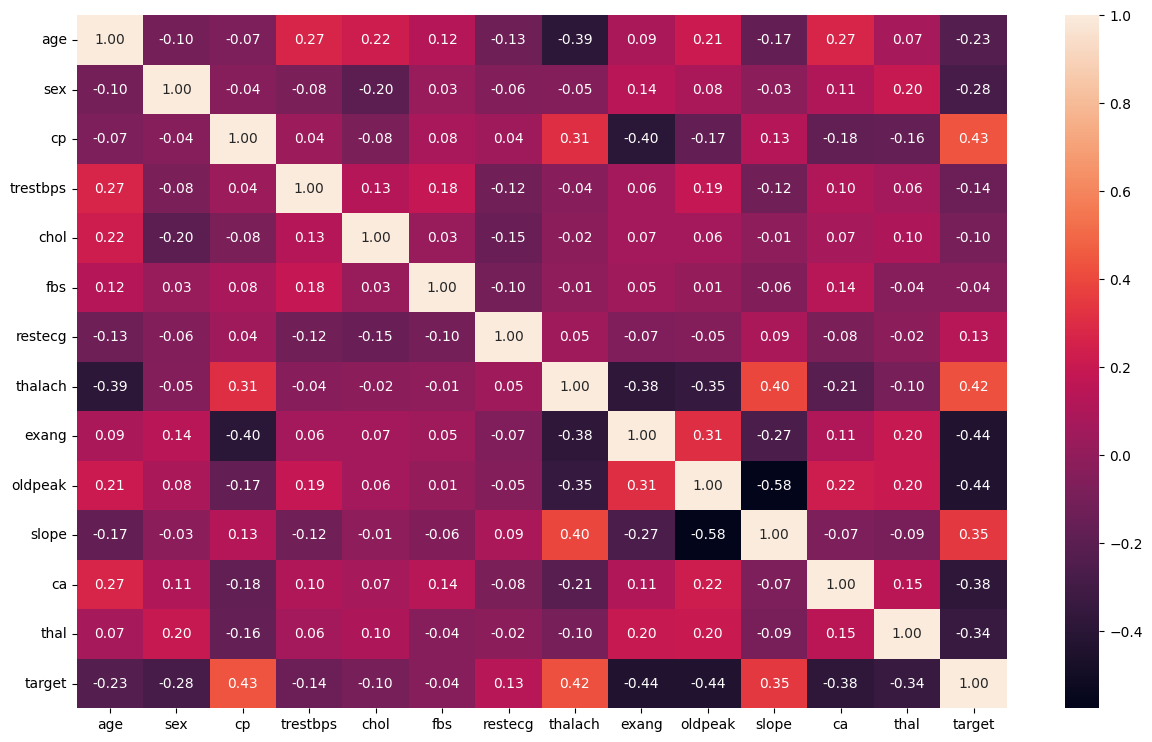

In [9]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [10]:
xArray = data.drop("target", axis=1)
yArray = data["target"]

In [11]:
#Разделяем выборку для обучения модели
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)

## Линейная регрессия

In [12]:
#Обучение модели
LR = LogisticRegression()
LR.fit(trainX, trainY)

C:\Users\alex_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
#Предсказание целевого признака
predict = LR.predict(testX)
predict

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [14]:
#Вычисление вероятности попадания в той или иной класс
predictpr = LR.predict_proba(testX)
predictpr

array([[0.92321135, 0.07678865],
       [0.04708618, 0.95291382],
       [0.10204461, 0.89795539],
       [0.20353914, 0.79646086],
       [0.97636994, 0.02363006],
       [0.16480827, 0.83519173],
       [0.25553882, 0.74446118],
       [0.19951007, 0.80048993],
       [0.28247183, 0.71752817],
       [0.545075  , 0.454925  ],
       [0.28098787, 0.71901213],
       [0.80797643, 0.19202357],
       [0.06560822, 0.93439178],
       [0.96932416, 0.03067584],
       [0.7543677 , 0.2456323 ],
       [0.35998881, 0.64001119],
       [0.99522809, 0.00477191],
       [0.07165204, 0.92834796],
       [0.95753791, 0.04246209],
       [0.545075  , 0.454925  ],
       [0.03832593, 0.96167407],
       [0.92321135, 0.07678865],
       [0.83992271, 0.16007729],
       [0.95273716, 0.04726284],
       [0.28098787, 0.71901213],
       [0.45713617, 0.54286383],
       [0.60099273, 0.39900727],
       [0.14771657, 0.85228343],
       [0.99544992, 0.00455008],
       [0.15831883, 0.84168117],
       [0.

In [15]:
#Оценка качества модели
balanced_accuracy_score(testY, LR.predict(testX))

0.8142679663608563

## SVM

In [16]:
#Обучение модели
svm = SVC(kernel='rbf', probability=True)
svm.fit(trainX, trainY) 

SVC(probability=True)

In [17]:
#Предсказание целевого признака
svm.predict_proba(testX)

array([[0.31435629, 0.68564371],
       [0.47196827, 0.52803173],
       [0.33494093, 0.66505907],
       [0.28034906, 0.71965094],
       [0.70265361, 0.29734639],
       [0.35390634, 0.64609366],
       [0.22790763, 0.77209237],
       [0.40525396, 0.59474604],
       [0.54014533, 0.45985467],
       [0.34643401, 0.65356599],
       [0.17624193, 0.82375807],
       [0.7797147 , 0.2202853 ],
       [0.19864779, 0.80135221],
       [0.89127464, 0.10872536],
       [0.49313383, 0.50686617],
       [0.45053041, 0.54946959],
       [0.74538668, 0.25461332],
       [0.19288421, 0.80711579],
       [0.69216424, 0.30783576],
       [0.34643401, 0.65356599],
       [0.26564905, 0.73435095],
       [0.31435629, 0.68564371],
       [0.83419137, 0.16580863],
       [0.6229255 , 0.3770745 ],
       [0.17624193, 0.82375807],
       [0.69792033, 0.30207967],
       [0.25140256, 0.74859744],
       [0.23399223, 0.76600777],
       [0.91906352, 0.08093648],
       [0.11414444, 0.88585556],
       [0.

In [18]:
#Оценка качества модели
balanced_accuracy_score(testY, svm.predict(testX))

0.7056574923547401

## Деревья решений

In [19]:
#Обучение модели
DeTree = DecisionTreeClassifier(random_state=1)
DeTree.fit(trainX, trainY)

DecisionTreeClassifier(random_state=1)

In [20]:
#Оценка качества модели
balanced_accuracy_score(testY, DeTree.predict(testX))

1.0

In [21]:
#Функция построения графика для вывода признаков, наиболее важных для определения целевого признака
def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

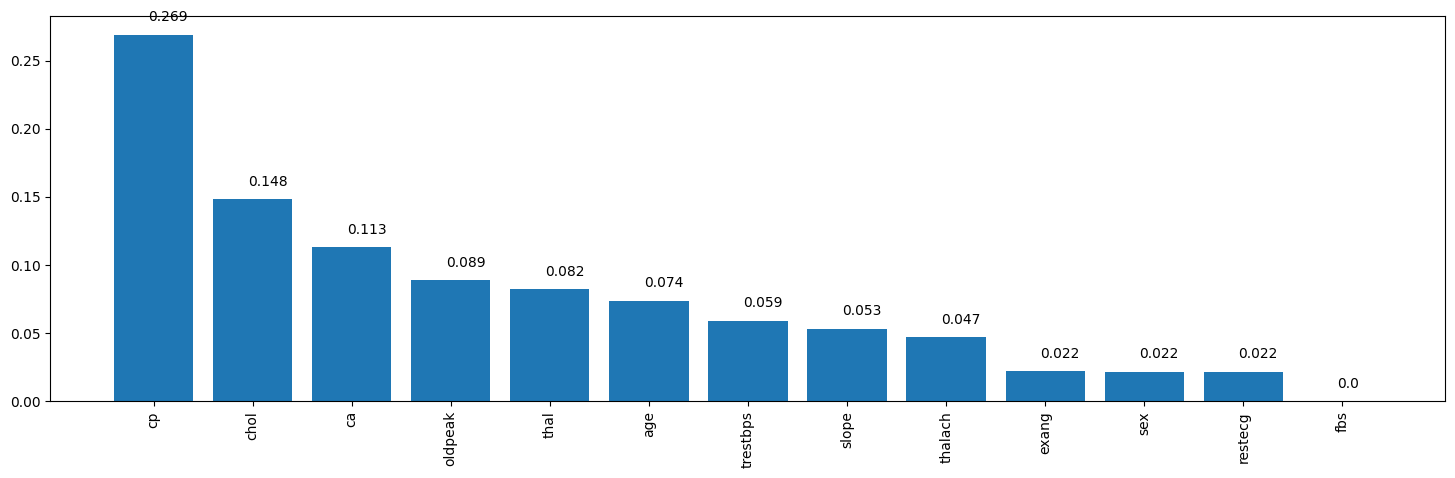

In [22]:
diagram, _ = draw_feature_importances(DeTree, data)

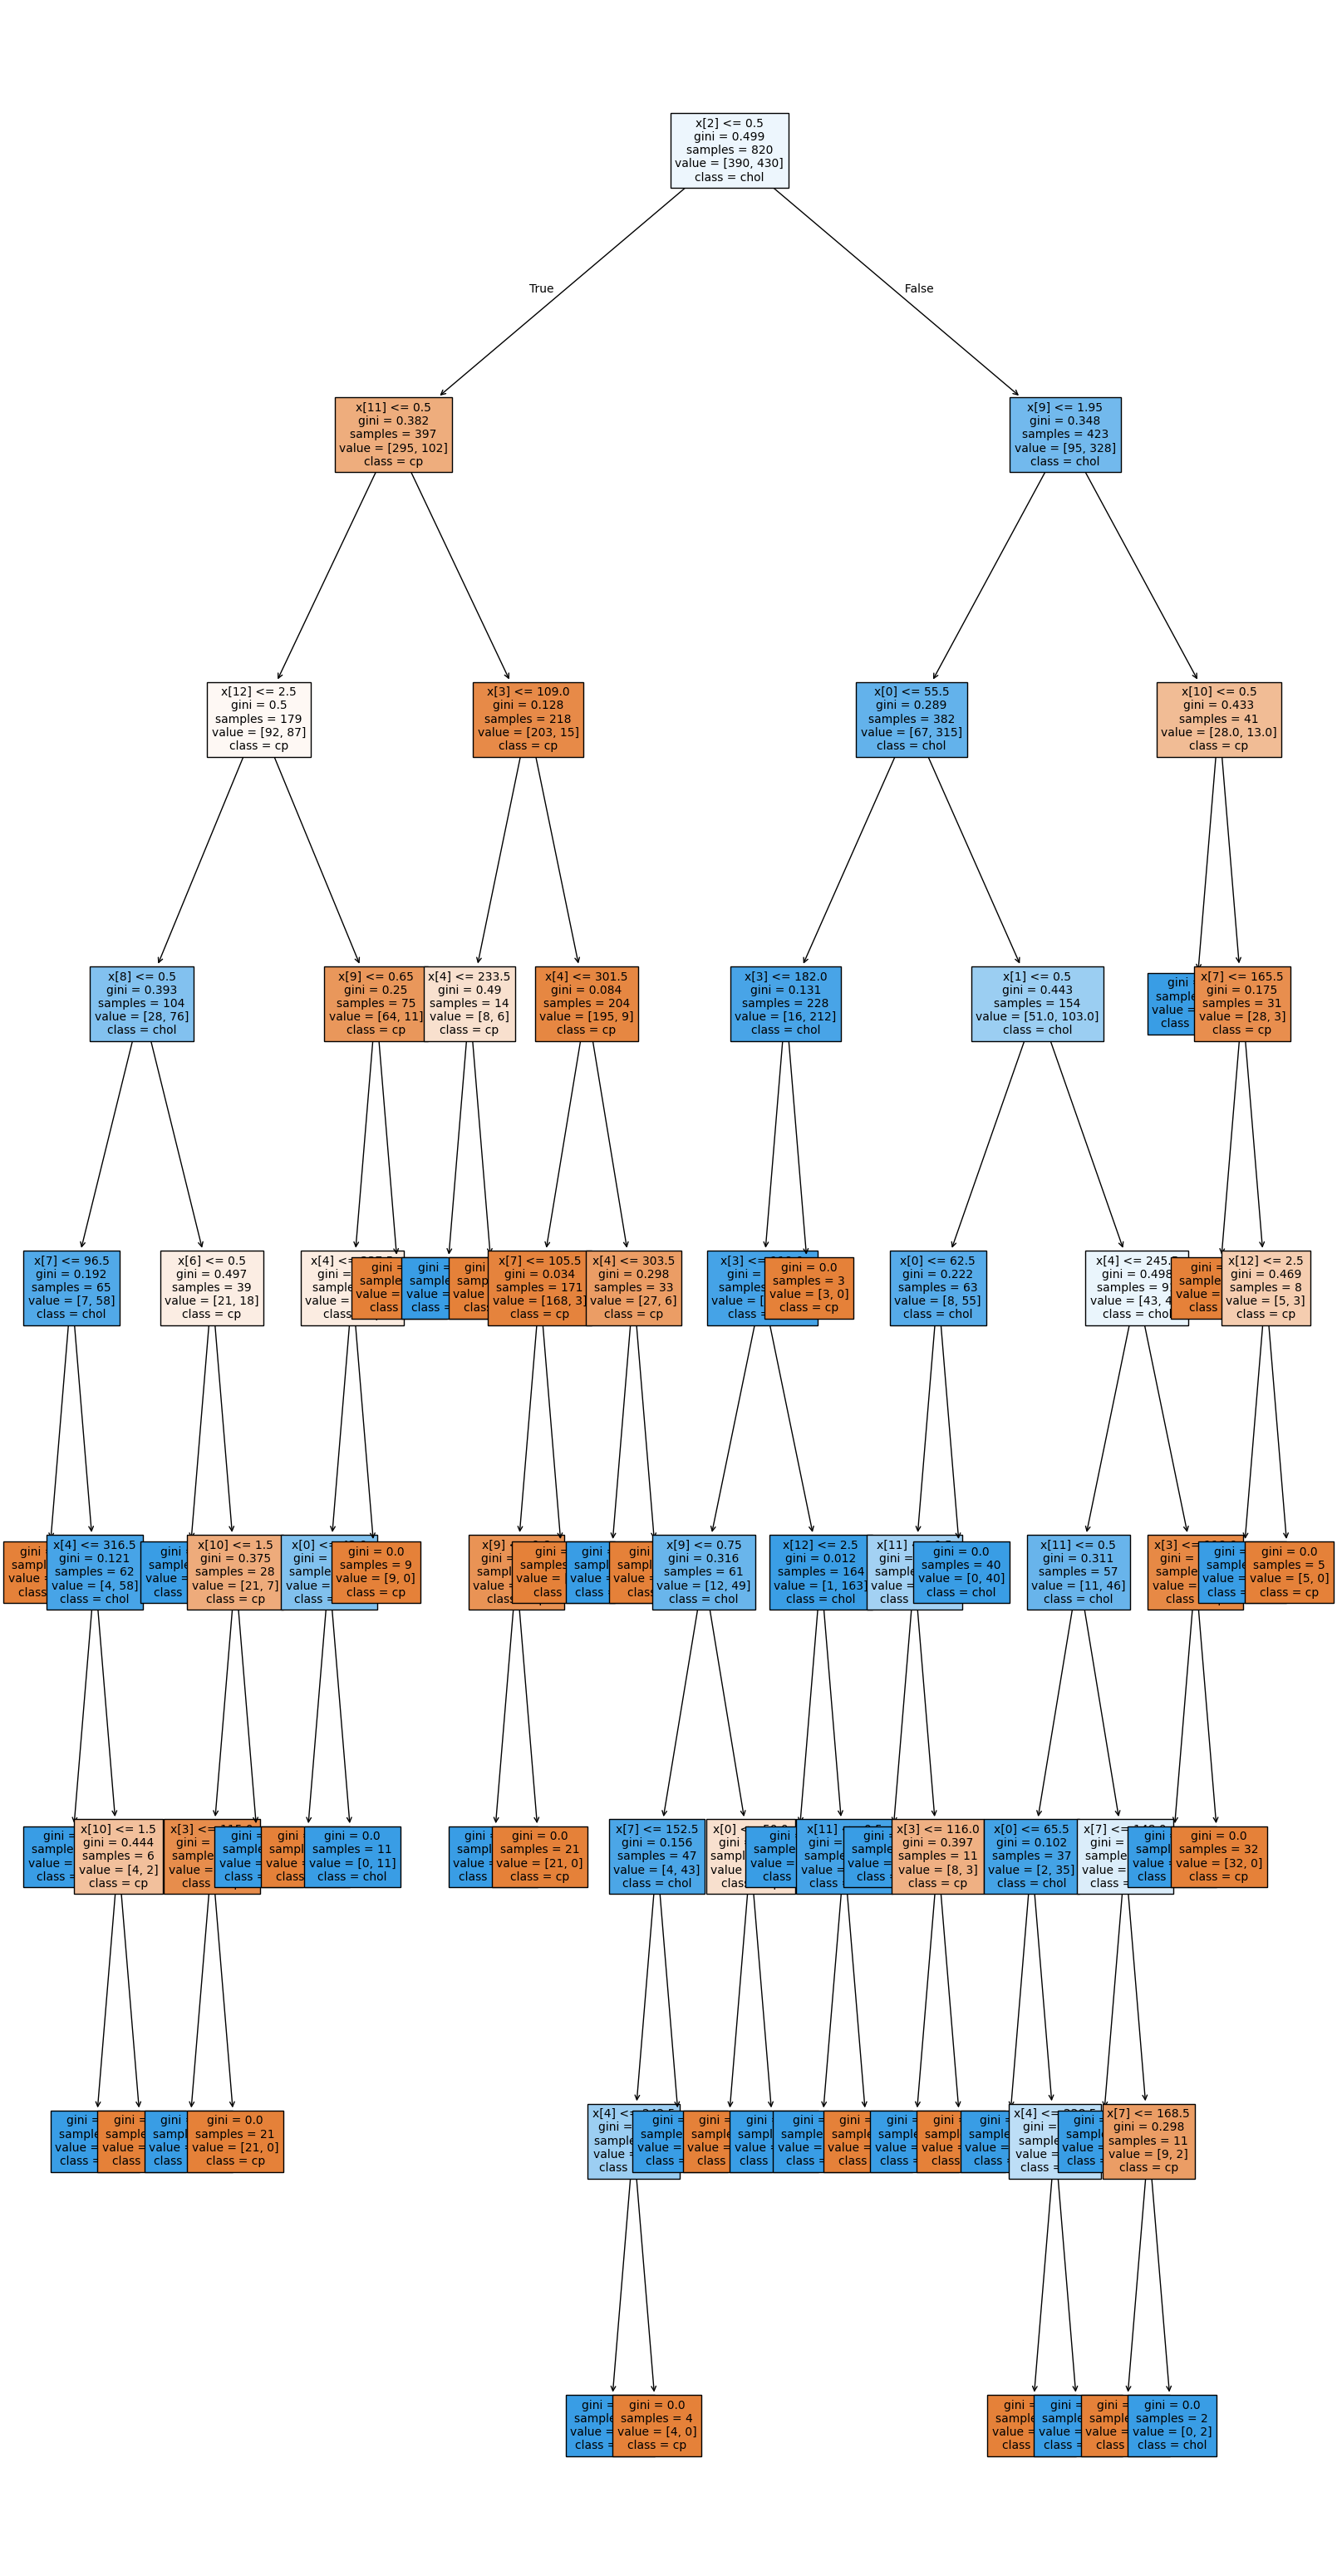

In [23]:
#Визуальное отображение дерева решений
fig, ax = plt.subplots(figsize=(20,40))
cn=['cp', 'chol', 'ca', 'oldpeak' ]
tree.plot_tree(DeTree, fontsize=10,class_names=cn, filled=True)
plt.show()